## Twitter Setiment Analysis 

### Part 3: Machine Learning with the Sentiment140 dataset 


### Load Pre-Processed Data

The timer decorator comes from Geir Arne Hjelle's [Real Python Tutorial](https://realpython.com/python-timer/#using-the-python-timer-decorator).

In [9]:
import os 
import time
import functools
import numpy as np
import scipy.sparse as sp

def timer(func):
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        tic = time.perf_counter()
        value = func(*args, **kwargs)
        toc = time.perf_counter()
        elapsed_time = toc - tic
        print(f"Elapsed time: {elapsed_time:0.4f} seconds")
        return value
    return wrapper_timer

In [10]:
dirpath = os.path.join("..","data","3_processed","sentiment140")
filenames = ['X_text_bow'
            ,'X_tokn_bow'
            ,'X_filt_bow'
            ,'X_stem_bow'
            ,'X_text_tfidf'
            ,'X_tokn_tfidf'
            ,'X_filt_tfidf'
            ,'X_stem_tfidf'
            ,'X_text_log_tfidf'
            ,'X_tokn_log_tfidf'
            ,'X_filt_log_tfidf'
            ,'X_stem_log_tfidf']

filepaths = [os.path.join(dirpath, ''.join([filename, '.npz'])) for filename in filenames]

In [11]:
# load pre-processed featre vectors
@timer
def load_data():
    X_text_bow       = sp.load_npz(filepaths[0])
    X_tokn_bow       = sp.load_npz(filepaths[1])
    X_filt_bow       = sp.load_npz(filepaths[2])
    X_stem_bow       = sp.load_npz(filepaths[3])
    X_text_tfidf     = sp.load_npz(filepaths[4])
    X_tokn_tfidf     = sp.load_npz(filepaths[5])
    X_filt_tfidf     = sp.load_npz(filepaths[6])
    X_stem_tfidf     = sp.load_npz(filepaths[7])
    X_text_log_tfidf = sp.load_npz(filepaths[8])
    X_tokn_log_tfidf = sp.load_npz(filepaths[9])
    X_filt_log_tfidf = sp.load_npz(filepaths[10])
    X_stem_log_tfidf = sp.load_npz(filepaths[11])
    
    return (  X_text_bow      
            , X_tokn_bow      
            , X_filt_bow      
            , X_stem_bow      
            , X_text_tfidf    
            , X_tokn_tfidf    
            , X_filt_tfidf    
            , X_stem_tfidf    
            , X_text_log_tfidf
            , X_tokn_log_tfidf
            , X_filt_log_tfidf
            , X_stem_log_tfidf
            )

In [4]:
( X_text_bow      
, X_tokn_bow      
, X_filt_bow      
, X_stem_bow      
, X_text_tfidf    
, X_tokn_tfidf    
, X_filt_tfidf    
, X_stem_tfidf    
, X_text_log_tfidf
, X_tokn_log_tfidf
, X_filt_log_tfidf
, X_stem_log_tfidf
) = load_data()

Elapsed time: 29.0256 seconds


In [5]:
# load y target vector
y = np.load(os.path.join(dirpath, 'y.npy'))

##  Feature Extraction

TODO: feature extraction (text length?)

TODO: feature selection?

TODO: N-grams?

## Modeling Phase

In [12]:
from sklearn.utils.random import sample_without_replacement

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [14]:
X_text_bow.shape, round(X_text_bow.shape[0]/50, 0)

((1565200, 682281), 31304.0)

### Random Sample 10%

In [15]:
pct_ = round(X_text_bow.shape[0]/10, 0)

ix = sample_without_replacement(n_population=X_text_bow.shape[0],
                                n_samples=pct_, random_state=42)

X_text_bow_sample = X_text_bow[ix,]
X_tokn_bow_sample = X_tokn_bow[ix,]
y_sample = y[ix,]

sum(y_sample) / len(y_sample) # target class is balanced

0.5002938921543573

### Naive Bayes

In [16]:
clf = MultinomialNB()
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

In [17]:
np.mean(cross_val_score(clf, X_text_bow, y, cv=5, scoring='accuracy')), \
np.mean(cross_val_score(clf, X_tokn_bow, y, cv=5, scoring='accuracy'))

(0.7693655762841809, 0.771123179146435)

In [18]:
np.mean(cross_val_score(clf, X_text_bow, y, cv=5, scoring='recall')), \
np.mean(cross_val_score(clf, X_tokn_bow, y, cv=5, scoring='recall'))

(0.7348243292044143, 0.7398570572445755)

In [19]:
np.mean(cross_val_score(clf, X_text_bow, y, cv=5, scoring='precision')), \
np.mean(cross_val_score(clf, X_tokn_bow, y, cv=5, scoring='precision'))

(0.7901441713397331, 0.7900114926941192)

In [20]:
np.mean(cross_val_score(clf, X_text_bow, y, cv=5, scoring='roc_auc')), \
np.mean(cross_val_score(clf, X_tokn_bow, y, cv=5, scoring='roc_auc'))

(0.8433128952613094, 0.845194231582042)

In [21]:
# split full tokenized set 
X_train, X_test, y_train, y_test = \
train_test_split(X_tokn_bow, y, test_size=0.2, random_state=42)

In [22]:
y_scores = cross_val_predict(clf, X_train, y_train, cv=5)

In [23]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

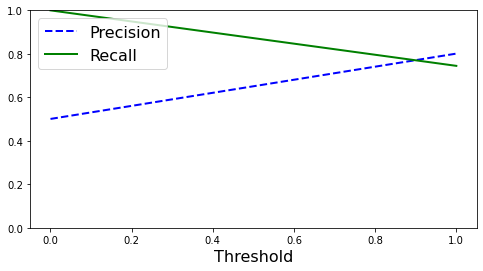

In [24]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

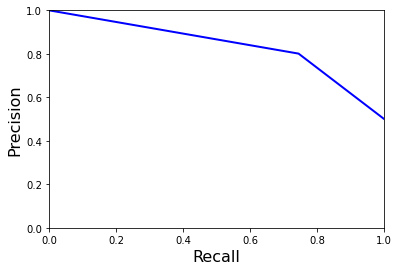

In [25]:
plt.figure(figsize=(6, 4))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [26]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

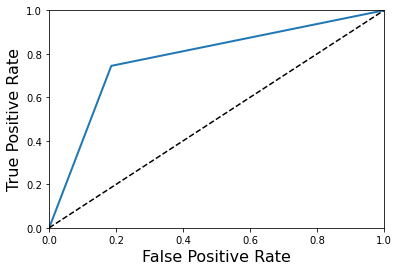

In [27]:
plt.figure(figsize=(6, 4))
plot_roc_curve(fpr, tpr)
plt.show()

In [28]:
@timer
def plot_learning_curves(model, X, y):
    """Plot the learning curves for train and validation sets, given a model,
    a dataset X, and a target feature vector y.
    """
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_acc, val_acc = [], []
    
    for m in range(1, X_train.shape[0], 100):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_acc.append(accuracy_score(y_train[:m], y_train_predict))
        val_acc.append(accuracy_score(y_val, y_val_predict))

    plt.figure(figsize=(18,10))
    plt.plot(np.sqrt(train_acc), 'r--', linewidth=.8, label="train accuracy")
    plt.plot(np.sqrt(val_acc), 'b--', linewidth=.8, label="validation accuracy")

    plt.title("Learning Rate During Training and Validation", fontsize=16)
    plt.axis([0, round(X_train.shape[0]/100,0), 0.5, 1.0])
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training Set Size", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)

In [29]:
# sanity check
X_tokn_bow_sample, len(y_sample)

(<156520x749740 sparse matrix of type '<class 'numpy.int64'>'
 	with 1840100 stored elements in Compressed Sparse Row format>,
 156520)

Elapsed time: 314.8739 seconds


<Figure size 1296x720 with 0 Axes>

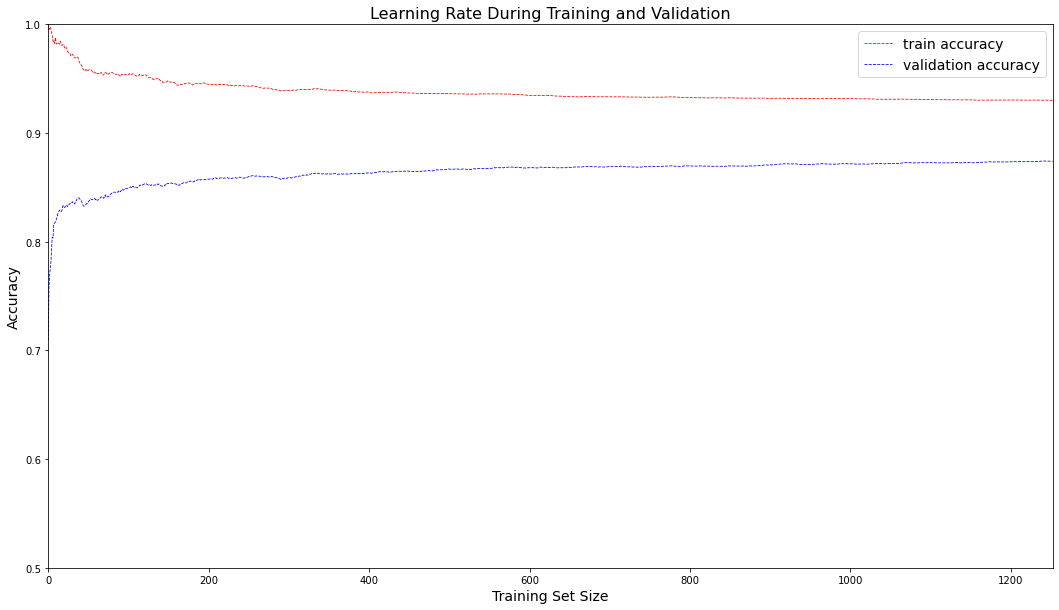

In [30]:
plt.figure(figsize=(18, 10))
plot_learning_curves(clf, X_tokn_bow_sample, y_sample)
plt.show()

- X-axis index needs to be 100x 
- NB clf isn't learning after 50k, so data size is useless
- underfitting - need more complex model

### Support Vector Machines


In [50]:
# split sampled tokenized set 
X_train, X_test, y_train, y_test = \
train_test_split(X_tokn_bow_sample, y_sample, test_size=0.2, random_state=42)

In [51]:
@timer
def train_SVC(X_train, y_train):

    svm_clf = SVC(gamma="auto")
    svm_clf.fit(X_train, y_train)

    return svm_clf

In [52]:
svm_clf = train_SVC(X_train, y_train)

Elapsed time: 2914.0504 seconds


In [78]:
print(str(round(2914.0504/60,2)), " mins.")

48.57  mins.


In [58]:
dirpath = os.path.join("..","data","4_models","sentiment140")

from pathlib import Path
Path(dirpath).mkdir(parents=True, exist_ok=True)

### Persist Model

In [76]:
from joblib import dump, load

now = str(int(time.time()))
filename = ''.join([now, "_svm_clf_tokn_bow_10pctsample_48min.joblib"])
filepath = os.path.join(dirpath, filename)

In [77]:
dump(svm_clf, filepath)

['..\\data\\4_models\\sentiment140\\1601009417_svm_clf_tokn_bow_10pctsample_48min.joblib']

---